In [1]:
# install ucimlrepo, pandas, imblearn, seaborn, matplotlib numpy and scikit-learn packages
from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 

# shape of data
x.shape, y.shape

((48842, 14), (48842, 1))

## Corpus Preparation

In [3]:
# look for shape, null values, data types
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [4]:
# look for null values, data type
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [5]:
import pandas as pd

In [6]:
# concatenate the features and targets into one dataframe for pre-processing
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48480,37,Private,171393,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1740,40,United-States,<=50K.
14822,35,Private,200153,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
11240,45,Self-emp-not-inc,54098,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,>50K


In [7]:
# view how many records are duplicated
df.duplicated().value_counts()

False    48813
True        29
Name: count, dtype: int64

In [8]:
# drop duplicated samples keeping the first one
df = df.drop_duplicates(keep = 'first')
df.shape

(48813, 15)

In [9]:
from matplotlib import pyplot as plt

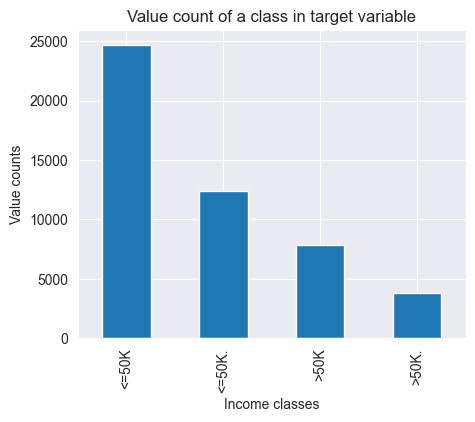

In [10]:
# visualise the imbalances of the dataset
plt.figure(figsize=(5, 4))
df['income'].value_counts().plot(kind = 'bar')
plt.title('Value count of a class in target variable')
plt.xlabel('Income classes')
plt.ylabel('Value counts')
plt.show()

In [11]:
# separate features and targets for sampling
x = df.drop(columns=['income'])
y = df['income']

In [12]:
from imblearn.over_sampling import RandomOverSampler

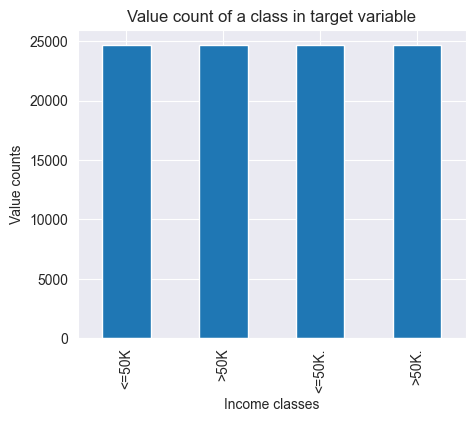

In [13]:
oversample = RandomOverSampler(random_state=42)

# resample and balance the dataset
x, y = oversample.fit_resample(x, y)

plt.figure(figsize=(5, 4))
y.value_counts().plot(kind = 'bar')
plt.title('Value count of a class in target variable')
plt.xlabel('Income classes')
plt.ylabel('Value counts')
plt.show()

In [14]:
# concatenate the features and targets into one dataframe for pre-processing
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
41187,36,Private,101192,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K.
86787,43,Self-emp-inc,123490,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K.
4705,40,Private,273308,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,48,Mexico,<=50K


In [15]:
df.shape

(98792, 15)

In [16]:
# view unique values with value counts
df['income'].value_counts()

income
<=50K     24698
>50K      24698
<=50K.    24698
>50K.     24698
Name: count, dtype: int64

In [17]:
# method to make the problem into binary classification problem
# 1 for income > 50K and 0 for <= 50K
def process_income(income):
    if income == '>50K.':
        return 1
    elif income == '<=50K.':
        return 0
    elif income == '>50K':
        return 1
    elif income == '<=50K':
        return 0
    
df['income'] = df['income'].apply(process_income)
df['income'].value_counts()

income
0    49396
1    49396
Name: count, dtype: int64

In [18]:
import seaborn as sns

<Axes: >

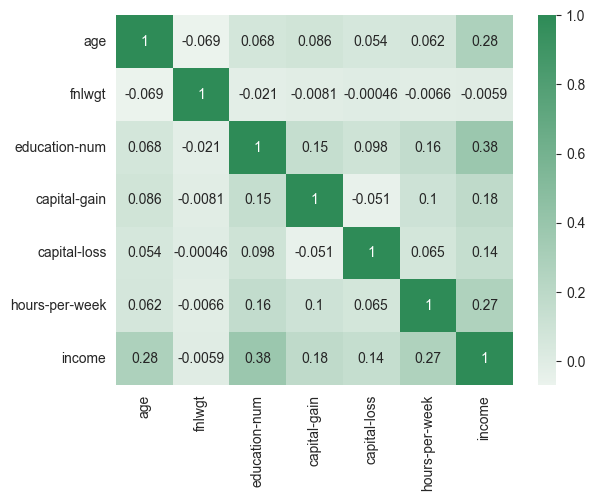

In [19]:
numerical_features = df.select_dtypes(include=['int64'])
corr_metrics = numerical_features.corr()
sns.heatmap(corr_metrics, annot=True, cmap=sns.light_palette("seagreen", as_cmap=True))

In [20]:
# drop non dependent variables
df = df.drop(columns='fnlwgt')

In [21]:
df['age'].describe()

count    98792.000000
mean        40.575239
std         13.015335
min         17.000000
25%         31.000000
50%         40.000000
75%         49.000000
max         90.000000
Name: age, dtype: float64

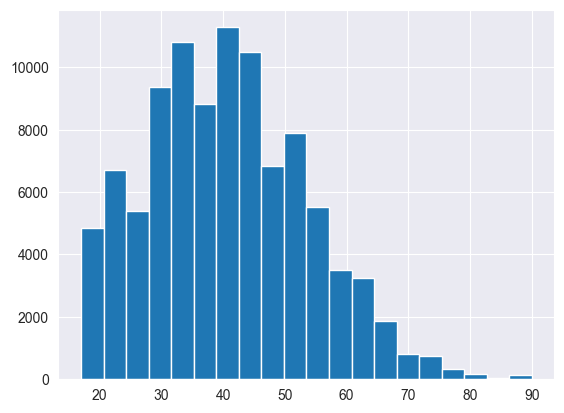

In [22]:
# visualise how the age values are distributed
plt.hist(df['age'], bins=20)
plt.show()

In [23]:
# view the frequency of ages greater than 80
age_filter_80 = (df['age'] > 80)
df.loc[age_filter_80]['age'].value_counts()

age
90    109
81     74
83     21
82     19
84     18
88     13
85     11
89      5
87      4
86      1
Name: count, dtype: int64

In [24]:
# replace age values between 84 and 90 by mean value of 84 and 90 to increase the record count for training
age_filter_84 = (df['age'] > 84)
age_filter_90 = (df['age'] < 90)
df.loc[age_filter_84 & age_filter_90, 'age'] = int((85 + 90)/ 2)
df.loc[age_filter_80]['age'].value_counts()

age
90    109
81     74
87     34
83     21
82     19
84     18
Name: count, dtype: int64

In [25]:
# as the workclass contains null values, view the count
df['workclass'].isnull().sum()

2259

In [26]:
# fill the null values using a new class calles 'Unknown'
df['workclass'] = df['workclass'].fillna('Unknown')
df['workclass'].value_counts()

workclass
Private             66420
Self-emp-not-inc     8247
Local-gov            6861
Self-emp-inc         5011
State-gov            4192
Federal-gov          3565
Unknown              2259
?                    2191
Without-pay            35
Never-worked           11
Name: count, dtype: int64

In [27]:
# view the values counts of income for who were Without-pay and Never-worked
workclass_filt_wp = (df['workclass'] == 'Without-pay')
workclass_filt_nw = (df['workclass'] == 'Never-worked')

df.loc[workclass_filt_wp | workclass_filt_nw, 'income'].value_counts()

income
0    36
1    10
Name: count, dtype: int64

In [28]:
# method to rename '?' value to 'Unknown' and get 'Without-pay' and 'Never-worked' to 'Un-employed' class to increase the amount of records
def process_workclass(workclass):
    if workclass == '?':
        return 'Unknown'
    elif workclass in ['Without-pay', 'Never-worked']:
        return 'Un-employed'
    else:
        return workclass
    
df['workclass'] = df['workclass'].apply(process_workclass)
df['workclass'].value_counts()

workclass
Private             66420
Self-emp-not-inc     8247
Local-gov            6861
Self-emp-inc         5011
Unknown              4450
State-gov            4192
Federal-gov          3565
Un-employed            46
Name: count, dtype: int64

In [29]:
# view the frequency of classes in education feature
df['education'].value_counts()

education
HS-grad         28174
Some-college    20402
Bachelors       20254
Masters          7746
Assoc-voc        4258
Assoc-acdm       3396
Prof-school      2781
11th             2747
10th             2134
Doctorate        2059
7th-8th          1480
9th              1128
12th             1008
5th-6th           777
1st-4th           327
Preschool         121
Name: count, dtype: int64

In [30]:
# check for outliers
filt_preschool = (df['education'] == 'Preschool')
df.loc[filt_preschool, 'income'].value_counts()

income
0    113
1      8
Name: count, dtype: int64

In [31]:
# discover the outlier
filt_preschool_out = ((df['education'] == 'Preschool') & (df['income'] == 1))
df.loc[filt_preschool_out].drop_duplicates().shape[0]

1

In [32]:
# as a result of oversampling the outlier has duplicated 5 times and drop it
df = df.loc[~filt_preschool_out]

In [33]:
filt_1_4 = (df['education'] == '1st-4th')
df.loc[filt_1_4, 'income'].value_counts()

income
0    299
1     28
Name: count, dtype: int64

In [34]:
filt_1_4_out = ((df['education'] == '1st-4th') & (df['income'] == 1))
df.loc[filt_1_4_out].drop_duplicates().shape[0]

8

In [35]:
# check the frequency of education-num values
df['education-num'].value_counts()

education-num
9     28174
10    20402
13    20254
14     7746
11     4258
12     3396
15     2781
7      2747
6      2134
16     2059
4      1480
5      1128
8      1008
3       777
2       327
1       113
Name: count, dtype: int64

In [36]:
# check the frequency of marital-status values
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       58804
Never-married            23438
Divorced                 10703
Widowed                   2424
Separated                 2294
Married-spouse-absent     1032
Married-AF-spouse           89
Name: count, dtype: int64

In [37]:
# check for the target value balance for Married-AF-spouse
filt_af_spouse = df['marital-status'] == 'Married-AF-spouse'
df.loc[filt_af_spouse, 'income'].value_counts()

income
1    53
0    36
Name: count, dtype: int64

In [38]:
# as the occupation contains null values, view the count
df['occupation'].isnull().sum()

2263

In [39]:
# fill null values with new class 'Unknown'
df['occupation'] = df['occupation'].fillna('Unknown')
df['occupation'].value_counts()

occupation
Exec-managerial      16545
Prof-specialty       16266
Craft-repair         12056
Sales                11628
Adm-clerical          9699
Other-service         7134
Machine-op-inspct     5074
Transport-moving      4418
Handlers-cleaners     3225
Tech-support          3192
Farming-fishing       2524
Unknown               2263
?                     2198
Protective-serv       2179
Priv-house-serv        339
Armed-Forces            44
Name: count, dtype: int64

In [40]:
# fill '?' values with 'Unknown' value
df['occupation'] = df['occupation'].apply(lambda x : 'Unknown' if x == '?' else x)

In [41]:
# check for outliers
filt_af = (df['occupation'] == 'Armed-Forces')
df.loc[filt_af, 'income'].value_counts()

income
1    32
0    12
Name: count, dtype: int64

In [42]:
filt_af_out = ((df['occupation'] == 'Armed-Forces') & (df['income'] == 1))
df.loc[filt_af_out].drop_duplicates().shape[0]

5

In [43]:
# check for the frequency of relationship values
df['relationship'].value_counts()

relationship
Husband           51926
Not-in-family     20338
Own-child         10426
Unmarried          7651
Wife               6291
Other-relative     2152
Name: count, dtype: int64

In [44]:
# check if the 'Unmarried' values are accurate
filt_unmarried = (df['relationship'] == 'Unmarried')
df.loc[filt_unmarried, 'marital-status'].value_counts()

marital-status
Divorced                 3677
Never-married            1803
Separated                 998
Widowed                   897
Married-spouse-absent     276
Name: count, dtype: int64

In [45]:
# check for the frequency of race values
df['race'].value_counts()

race
White                 86355
Black                  7812
Asian-Pac-Islander     3124
Amer-Indian-Eskimo      779
Other                   714
Name: count, dtype: int64

In [46]:
# check for the frequency of sex values
df['sex'].value_counts()

sex
Male      72070
Female    26714
Name: count, dtype: int64

In [47]:
df['capital-gain'].describe()

count    98784.000000
mean      2107.515205
std      10689.089529
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [48]:
# check how many 0 in the capital-gain
(df['capital-gain'] == 0).sum()

86186

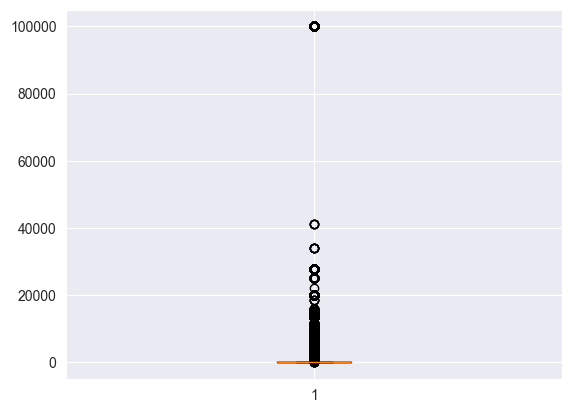

In [49]:
# check for outliers in capital-gain
plt.boxplot(df['capital-gain'])
plt.show()

In [50]:
# check if the outlier affects training process
(df['capital-gain'] > 80000).sum()

1043

In [51]:
df['capital-loss'].describe()

count    98784.000000
mean       123.642057
std        478.773342
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [52]:
# check how many 0 in the capital-loss
(df['capital-loss'] == 0).sum()

92442

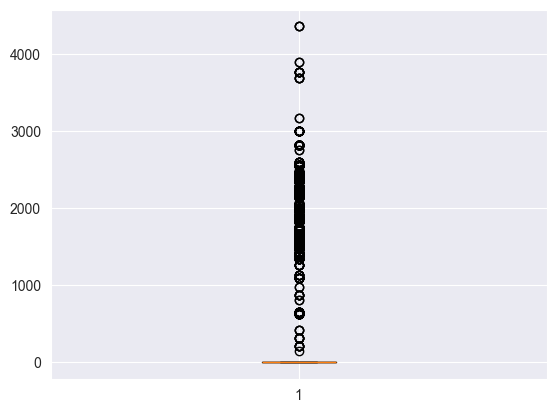

In [53]:
plt.boxplot(df['capital-loss'])
plt.show()

In [54]:
df['hours-per-week'].describe()

count    98784.000000
mean        42.112741
std         12.236244
min          1.000000
25%         40.000000
50%         40.000000
75%         48.000000
max         99.000000
Name: hours-per-week, dtype: float64

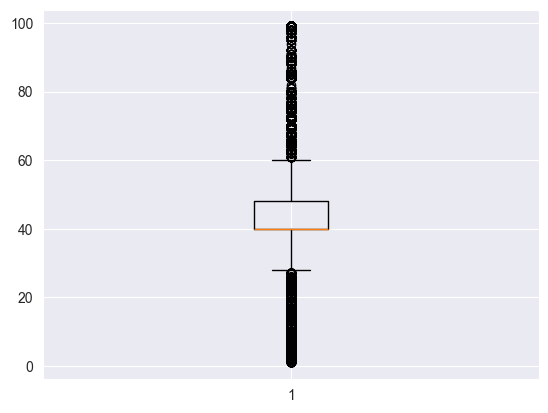

In [55]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [56]:
# as the native-country contains null values, view the count

df['native-country'].isnull().sum()

858

In [57]:
# fill null values with new values 'Other'

df['native-country'] = df['native-country'].fillna('Other')
df['native-country'].value_counts()

native-country
United-States                 89340
Mexico                         1340
?                               923
Other                           858
Philippines                     633
Canada                          420
Germany                         413
India                           392
England                         318
Puerto-Rico                     307
Cuba                            276
China                           262
El-Salvador                     242
Italy                           223
Japan                           214
South                           201
Jamaica                         170
Poland                          168
Dominican-Republic              158
Taiwan                          155
Iran                            141
Portugal                        134
Greece                          134
Columbia                        130
Haiti                           126
Vietnam                         125
Guatemala                       113
France       

In [58]:
# replace '?' values to 'Other'

df['native-country'] = df['native-country'].apply(lambda x: 'Other' if x == '?' else x)

In [59]:
# replace the values with 'Other' where frequency is less than 50

filt_n_country = df['native-country'].value_counts()
classes_to_replace = (filt_n_country[filt_n_country < 100].index)
df.loc[df['native-country'].isin(classes_to_replace), 'native-country'] = 'Other'
df['native-country'].value_counts()

native-country
United-States         89340
Other                  2548
Mexico                 1340
Philippines             633
Canada                  420
Germany                 413
India                   392
England                 318
Puerto-Rico             307
Cuba                    276
China                   262
El-Salvador             242
Italy                   223
Japan                   214
South                   201
Jamaica                 170
Poland                  168
Dominican-Republic      158
Taiwan                  155
Iran                    141
Portugal                134
Greece                  134
Columbia                130
Haiti                   126
Vietnam                 125
Guatemala               113
France                  101
Name: count, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98784 entries, 0 to 98791
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             98784 non-null  int64 
 1   workclass       98784 non-null  object
 2   education       98784 non-null  object
 3   education-num   98784 non-null  int64 
 4   marital-status  98784 non-null  object
 5   occupation      98784 non-null  object
 6   relationship    98784 non-null  object
 7   race            98784 non-null  object
 8   sex             98784 non-null  object
 9   capital-gain    98784 non-null  int64 
 10  capital-loss    98784 non-null  int64 
 11  hours-per-week  98784 non-null  int64 
 12  native-country  98784 non-null  object
 13  income          98784 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 11.3+ MB


In [61]:
x = df.drop(columns=['income'])
y = df['income']

In [62]:
x = pd.get_dummies(x)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# split the dataset 6 : 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_train.shape, x_test.shape

((59270, 91), (39514, 91))

In [65]:
x_test.drop_duplicates().shape[0]

23821

In [66]:
# check the values counts of target in testing set to evaluate the result of confusion_matrix
y_test.value_counts()

income
0    19860
1    19654
Name: count, dtype: int64

In [67]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

## Naive Bayes Algorithm

In [68]:
# as the problem is changet do binary classification problem, use the BernoulliNB algorithm
bernouli_model = BernoulliNB()
bernouli_model.fit(x_train,y_train)

pred_train = bernouli_model.predict(x_train)
pred_test = bernouli_model.predict(x_test)

print('Training accuracy : ', accuracy_score(y_train, pred_train))
print('Testing accuracy : ', accuracy_score(y_test, pred_test))

Training accuracy :  0.7751813733760756
Testing accuracy :  0.7759022118742724


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# define parameters to introduce to GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'force_alpha': [True, False],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.6, 0.4], [0.4, 0.6]]
}

In [71]:
grid_search_bernouli = GridSearchCV(estimator = bernouli_model, param_grid = param_grid)
grid_search_bernouli.fit(x_train,y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'binarize': [0.0, 0.5, 1.0],
                         'class_prior': [None, [0.5, 0.5], [0.6, 0.4],
                                         [0.4, 0.6]],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]})

In [72]:
# vew the optimal parameter list
grid_search_bernouli.best_params_

{'alpha': 0.5,
 'binarize': 0.0,
 'class_prior': [0.4, 0.6],
 'fit_prior': True,
 'force_alpha': True}

In [73]:
print('Training accuracy : ', grid_search_bernouli.score(x_train,y_train))
print('Testing accuracy : ', grid_search_bernouli.score(x_test,y_test))

Training accuracy :  0.7752994769697992
Testing accuracy :  0.7772941236017614


In [74]:
y_pred = grid_search_bernouli.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test, y_pred)

array([[14061,  5799],
       [ 3001, 16653]])

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76     19860
           1       0.74      0.85      0.79     19654

    accuracy                           0.78     39514
   macro avg       0.78      0.78      0.78     39514
weighted avg       0.78      0.78      0.78     39514


In [79]:
from sklearn.metrics import roc_curve

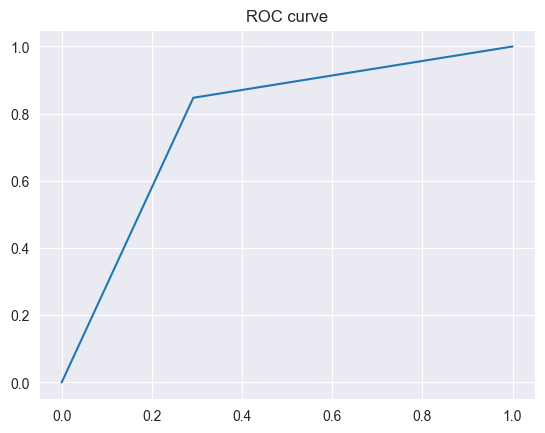

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
print('roc_auc_score : ', roc_auc_score(y_test, y_pred))

roc_auc_score :  0.7776572391189329


## Random Forest Classification Algorithm

In [83]:
from sklearn.ensemble import RandomForestClassifier

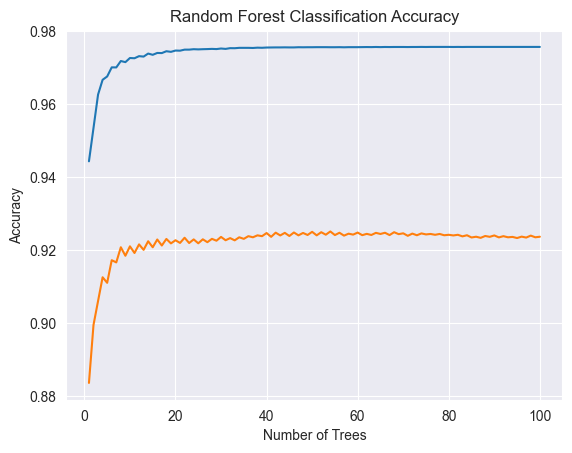

In [84]:
# list to store accuracy values
test_acc_list = []
train_acc_list = []

for i in range(1, 101):
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_model.fit(x_train, y_train)
    
    # training set
    train_pred = rf_model.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)
    
    # testing set
    test_pred = rf_model.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

plt.plot(range(1, 101), train_acc_list)
plt.plot(range(1, 101), test_acc_list)
plt.title('Random Forest Classification Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()

In [85]:
rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model.fit(x_train, y_train)

train_pred = rf_model.predict(x_train)
test_pred = rf_model.predict(x_test)

print('Training accuracy : ', accuracy_score(y_train, train_pred))
print('Testing accuracy : ', accuracy_score(y_test, test_pred))

Training accuracy :  0.9754175805635229
Testing accuracy :  0.924583691856051


In [86]:
# define parameters to introduce to GridSearchCV
param_grid = {
    'n_estimators': [40],
    'random_state': [42],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

In [87]:
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid)
grid_search_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=40, random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'n_estimators': [40],
                         'random_state': [42], 'warm_start': [True, False]})

In [88]:
# vew the optimal parameter list
grid_search_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'n_estimators': 40,
 'random_state': 42,
 'warm_start': True}

In [89]:
print('Training accuracy : ', grid_search_rf.score(x_train,y_train))
print('Testing accuracy : ', grid_search_rf.score(x_test,y_test))

Training accuracy :  0.9755862999831281
Testing accuracy :  0.924355924482462


In [90]:
y_pred = grid_search_rf.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test, y_pred)

array([[17920,  1940],
       [ 1049, 18605]])

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     19860
           1       0.91      0.95      0.93     19654

    accuracy                           0.92     39514
   macro avg       0.93      0.92      0.92     39514
weighted avg       0.93      0.92      0.92     39514


In [95]:
from sklearn.metrics import roc_curve

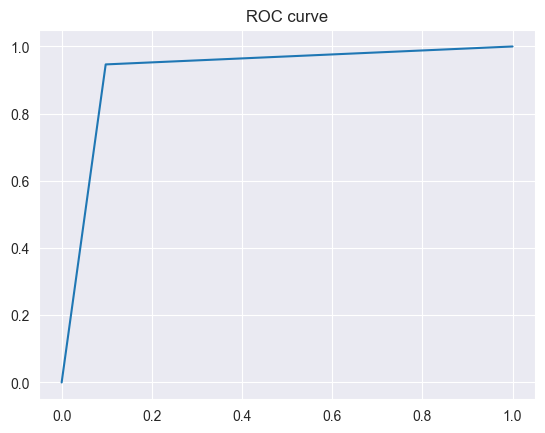

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.show()

In [97]:
print('roc_auc_score : ', roc_auc_score(y_test, y_pred))

roc_auc_score :  0.9244714271909062
